In [ ]:
import yfinance as yf

# Download Tesla stock data
tesla_data = yf.download('TSLA', start='2010-01-01', end='2023-01-01')

# Reset the index so 'Date' becomes a column
tesla_data.reset_index(inplace=True)

# Display the first 5 rows of the dataframe
print(tesla_data.head())


In [11]:
pip install selenium


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL with Tesla revenue data
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Get page content
page = requests.get(url).text
soup = BeautifulSoup(page, "html.parser")

# Find all tables on the page
tables = soup.find_all("table")

# Check the number of tables found and print the first table
print(f"Found {len(tables)} table(s).")

# Print the first table's HTML to inspect
if tables:
    print(tables[0])

# If a table is found, proceed to read it
if len(tables) > 0:
    tesla_revenue = pd.read_html(str(tables[0]))[0]
    tesla_revenue = tesla_revenue.rename(columns={"Tesla Quarterly Revenue (Millions of US $)": "Revenue", "Tesla Quarterly Revenue": "Date"})
    tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace('$','').str.replace(',','')
    tesla_revenue.dropna(inplace=True)

    # Display the last 5 rows
    print(tesla_revenue.tail())
else:
    print("No tables found on the page.")


Found 0 table(s).
No tables found on the page.


In [13]:
import yfinance as yf

# Download GameStop stock data
gme_data = yf.download('GME', start='2010-01-01', end='2023-01-01')

# Reset the index so 'Date' becomes a column
gme_data.reset_index(inplace=True)

# Display the first 5 rows of the dataframe
print(gme_data.head())


/tmp/ipykernel_118046/1193905820.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gme_data = yf.download('GME', start='2010-01-01', end='2023-01-01')
[*********************100%***********************]  1 of 1 completed

Price        Date     Close      High       Low      Open     Volume
Ticker                  GME       GME       GME       GME        GME
0      2010-01-04  3.854644  3.863060  3.703151  3.714934   26702800
1      2010-01-05  3.959005  3.996036  3.854643  3.856326   21269600
2      2010-01-06  4.044851  4.056634  3.908507  3.948905   21471200
3      2010-01-07  3.443930  3.563441  3.268872  3.368184  164761200
4      2010-01-08  3.415315  3.573540  3.405215  3.474229   47872400


In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL with GameStop revenue data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Get page content
page = requests.get(url).text
soup = BeautifulSoup(page, "html.parser")

# Find all tables on the page
tables = soup.find_all("table")

# Check if any tables were found
if len(tables) > 0:
    # If tables are found, try to read the first table
    gme_revenue = pd.read_html(str(tables[0]))[0]

    # Clean revenue data
    gme_revenue = gme_revenue.rename(columns={"GameStop Quarterly Revenue (Millions of US $)": "Revenue", "GameStop Quarterly Revenue": "Date"})
    gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace('$','').str.replace(',','')
    gme_revenue.dropna(inplace=True)

    # Display the last 5 rows
    print(gme_revenue.tail())
else:
    print("No tables found on the page.")


No tables found on the page.


/tmp/ipykernel_118046/1923855609.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tesla_data = yf.download('TSLA', start='2010-01-01', end='2023-01-01')
[*********************100%***********************]  1 of 1 completed


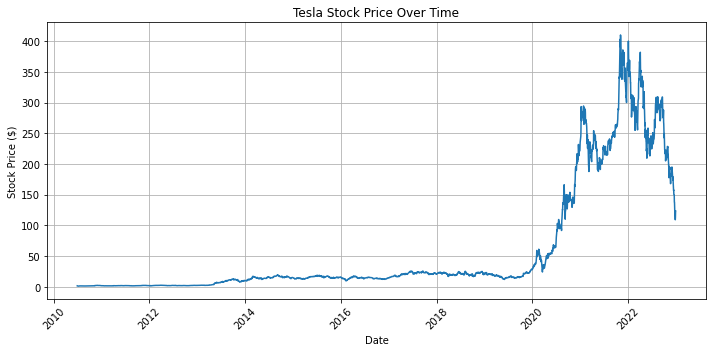

In [23]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Download Tesla stock data
tesla_data = yf.download('TSLA', start='2010-01-01', end='2023-01-01')

# Reset index to ensure 'Date' is a column
tesla_data.reset_index(inplace=True)

# Function to plot stock graph
def make_graph(stock_data, stock_name):
    # Convert 'Date' to datetime if it's not already
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])

    # Plot stock closing price
    plt.figure(figsize=(10,5))
    plt.plot(stock_data['Date'].values, stock_data['Close'].values)  # Use .values to ensure 1D arrays
    plt.title(f'{stock_name} Stock Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Stock Price ($)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot Tesla stock graph
make_graph(tesla_data, "Tesla")


/tmp/ipykernel_118046/3223343998.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gme_data = yf.download('GME', start='2010-01-01', end='2023-01-01')
[*********************100%***********************]  1 of 1 completed


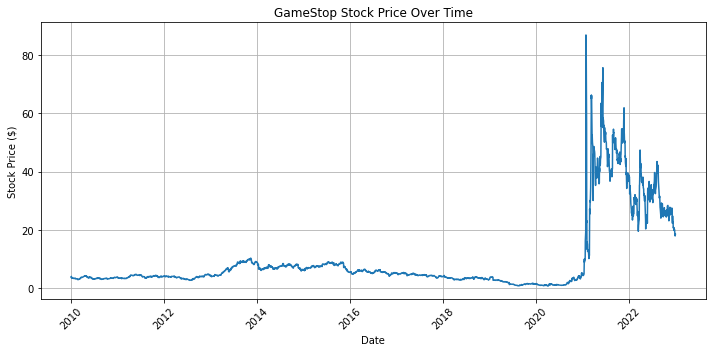

In [24]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Download GameStop stock data
gme_data = yf.download('GME', start='2010-01-01', end='2023-01-01')

# Reset index to ensure 'Date' is a column
gme_data.reset_index(inplace=True)

# Function to plot stock graph
def make_graph(stock_data, stock_name):
    # Convert 'Date' to datetime if it's not already
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])

    # Plot stock closing price
    plt.figure(figsize=(10,5))
    plt.plot(stock_data['Date'].values, stock_data['Close'].values)  # Use .values to ensure 1D arrays
    plt.title(f'{stock_name} Stock Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Stock Price ($)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot GameStop stock graph
make_graph(gme_data, "GameStop")
